# Projektarbeit: Anwendung von Methoden des Machine Learning anhand des Datensatzes "Palmers Penguins"

## Über Palmers Penguins

### Ursprung und Sammlung:
Die Daten wurden von Dr. Kristen Gorman und dem Palmer Station Long Term Ecological Research (LTER) Programm gesammelt.

Die Datensammlung fand zwischen 2007 und 2009 statt.
Die Pinguine wurden auf Inseln des Palmer-Archipels in der Antarktis beobachtet und vermessen.

### Inhalt:
Der Datensatz enthält Messungen und Beobachtungen von 344 erwachsenen Pinguinen.
Es sind Daten von drei verschiedenen Pinguinarten enthalten:

    Adeliepinguin (Adélie)
    Zügelpinguin (Chinstrap)
    Eselspinguin (Gentoo)

Die Pinguine stammen von drei verschiedenen Inseln im Palmer-Archipel:

    Biscoe
    Dream
    Torgersen

### Merkmale (Features)
Der Datensatz umfasst verschiedene physikalische Merkmale der Pinguine, darunter:

    Art (species): Die Pinguinart (Adélie, Chinstrap, Gentoo).
    Insel (island): Die Insel, auf der der Pinguin gefunden wurde (Biscoe, Dream, Torgersen).
    Schnabellänge (culmen_length_mm): Länge des Schnabels in Millimetern.
    Schnabeltiefe (culmen_depth_mm): Tiefe des Schnabels in Millimetern.
    Flossenlänge (flipper_length_mm): Länge der Flosse in Millimetern.
    Körpermasse (body_mass_g): Körpermasse in Gramm.
    Geschlecht (sex): Das Geschlecht des Pinguins (männlich, weiblich).

### Zweck und Anwendung
Der Hauptzweck des Datensatzes ist die Datenexploration und -visualisierung sowie das Lehren grundlegender Konzepte des maschinellen Lernens.
Er wird häufig für Klassifizierungsaufgaben verwendet, um die Pinguinart anhand ihrer physikalischen Merkmale vorherzusagen.
Auch für Regressionsprobleme (z.B. Vorhersage der Körpermasse basierend auf der Flossenlänge) und Clustering wird er eingesetzt.
Der Datensatz ist aufgrund seiner Sauberkeit, der gut definierten Kategorien und der anschaulichen Natur der Daten ideal für Anfänger in der Datenwissenschaft.


## Ziel der Projektarbeit

Die Teilnehmer der Schulung sollen in dieser Projektarbeit ihr erworbenes Wissen am Beispiel dieses Datensatzes anwenden.

Zur Anwendung kommen sollen:
- Die Erstellung deskriptiver Statistiken und eine erste Übersicht vom Datensatz
- Die Erkennung und geeignete Behandlung von fehlenden Werten und "Ausreißern" im Datensatz
- Eine erste grundlegende explorative Datenanalyse (EDA) auf Basis der Bibliothek "Seaborn"
- Eine Anwendung einer grundlegenden Methode des Feature Engineering (Umgang mit kategorialen Daten)
- Die Anwendund eines Modells zur Klassifizierung auf Basis des überwachten Lernens (z. B. RandomForestClassifier)  
- Die Anwendung eines Neuronalen Netzes zur Klassifizierung auf Basis der Bibliothek MLP (Achtung: vorher den Datensatz skalieren mit StandardScaler)
- Eine Aussage über die Qualität der Vorhersage der Modelle treffen (accuracy)
- "Bonus": sollte noch etwas Zeit bleiben, können noch 1-2 Plots auf Basis von Seaborn erstellt werden, die interessante
  Zusammenhänge der Pinguin-Populationen aufdecken 


## Im Folgenden werden die einzelnen Aufgabenschritte aufgeführt.

### 1. Laden der Bibliotheken (numpy, pandas, seaborn, etc.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Laden des Datensatzes "penguins_dirty.csv" in einen Pandas-DataFrame

In [2]:
df_penguins = pd.read_csv("penguins_dirty.csv")

### 3. Deskriptive Statistiken ermitteln und ersten Überblick über die Struktur gewinnen (describe, shape, info und head)

In [3]:
# Struktur des Datensatzes ermitteln
df_penguins.shape

(344, 7)

In [4]:
# Einen ersten Überblick verschaffen
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     339 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        339 non-null    float64
 6   sex                330 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# Übersicht Numerichen spalten
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,339.000000,342.000000,342.000000,339.000000
mean,43.944838,17.099123,201.763158,4200.442478
std,5.466687,2.157337,21.426394,804.905786
min,32.100000,1.000000,172.000000,2700.000000
25%,39.250000,15.525000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.500000,18.675000,213.750000,4762.500000
max,59.600000,21.500000,500.000000,6300.000000


### 4. Datensatz bereinigen
Fehlende Werte ermitteln. Den Datensatz mit geeigneten Methoden so bereinigen, dass keine NaN-Werte mehr enthalten sind.
Achten Sie auch auf die Zielvariable. Die Datenpunkte der Zielvariablen (Species) soll genau drei Pinguin-Arten enthalten.

In [7]:
# Anzahl der fehlenden Werte (NaNs) pro Spalte
df_penguins.isnull().sum()

species               0
island                0
bill_length_mm        5
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           5
sex                  14
dtype: int64

In [8]:
# Verteilung von sex
df_penguins.sex.value_counts()

sex
Male      165
Female    165
Name: count, dtype: int64

In [9]:
# Zeige Arten und Körpergewicht für Pinguine mit fehlendem Geschlechtseintrag
q = "sex.isna()"
df_penguins.query(q)[["species", "body_mass_g"]]

,species,body_mass_g
3,Adelie,NaN
8,Adelie,3475.0
9,Adelie,4250.0
10,Adelie,3300.0
11,Adelie,3700.0
47,Adelie,2975.0
109,Adelie,4775.0
186,Chinstrap,3600.0
246,Gentoo,4100.0
286,Gentoo,4650.0


In [10]:
# Ersetze fehlende Geschlechtsangaben durch Female
df_penguins['sex'].fillna("Female", inplace=True)

In [11]:
# Definiere numerische Spalten und fülle fehlende Werte mit dem Median jeder Spalte
num_cols = "bill_length_mm, body_mass_g, flipper_length_mm, bill_depth_mm".split(", ")
print(num_cols)

for col in num_cols:
    df_penguins[col].fillna(df_penguins[col].median(), inplace=True)

df_penguins.info()

['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'bill_depth_mm']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
#Übersicht der kategorialen Einträge erstellen
df_penguins["species"].unique()

array(['Adelie', 'Adellie', 'Chinstrap', 'Gentoo', 'Gentoo!'],
      dtype=object)

In [13]:
# Korrigiere Schreibfehler
mask = df_penguins.species == "Adellie"
df_penguins.loc[mask, "species"] = "Adelie"

In [14]:
# Korrigiere Schreibfehler
mask = df_penguins.species == "Gentoo!"
df_penguins.loc[mask, "species"] = "Gentoo"

In [15]:
#Insel check
df_penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [16]:
#Geschlecht check
df_penguins["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 5. Daten visualisieren und erste Erkenntnisse gewinnen (sns.pairplot)

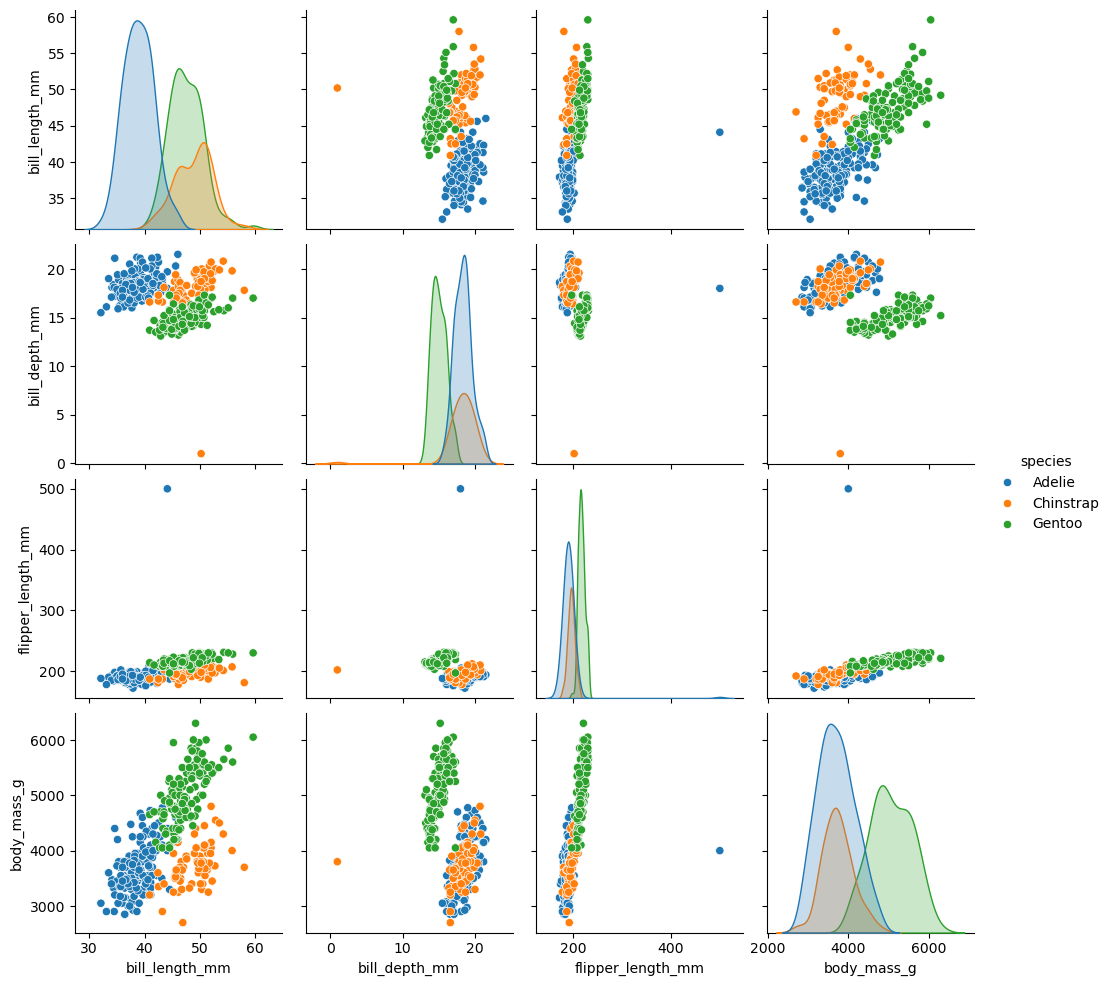

In [18]:
sns.pairplot(data=df_penguins, hue="species")
plt.show()

### 6. Ausreißer beseitigen

In [19]:
# Finde die minimale Schnabeltiefe bei Pinguinen der Art Chinstrap
mask = df_penguins.species == 'Chinstrap'
df_penguins[mask].bill_depth_mm.min()

1.0

In [20]:
# Wir weisen diesem Datenpunkt den Median von bill_depth_mm zu
# Ersetze bill_depth_mm = 1.0 bei 'Chinstrap' Pinguinen durch den Median der gesamten Spalte

bd_mm_median = df_penguins.bill_depth_mm.median()
q = "species == 'Chinstrap' and bill_depth_mm == 1.0"
df_penguins.loc[df_penguins.query(q).index, "bill_depth_mm"] = bd_mm_median

In [21]:
# Finde die maximale Flossenlänge bei Pinguinen der Art Adelie
mask = df_penguins.species == 'Adelie'
df_penguins[mask].flipper_length_mm.max()

500.0

In [22]:
# Wir weisen diesem Datenpunkt den Median von flipper_length_mm zu
# Ersetze flipper_length_mm = 500.0 bei 'Adelie' Pinguinen durch den Median der gesamten Spalte

fl_mm_median = df_penguins.flipper_length_mm.median()
q = "species == 'Adelie' and flipper_length_mm == 500.0"
df_penguins.loc[df_penguins.query(q).index, "flipper_length_mm"] = fl_mm_median

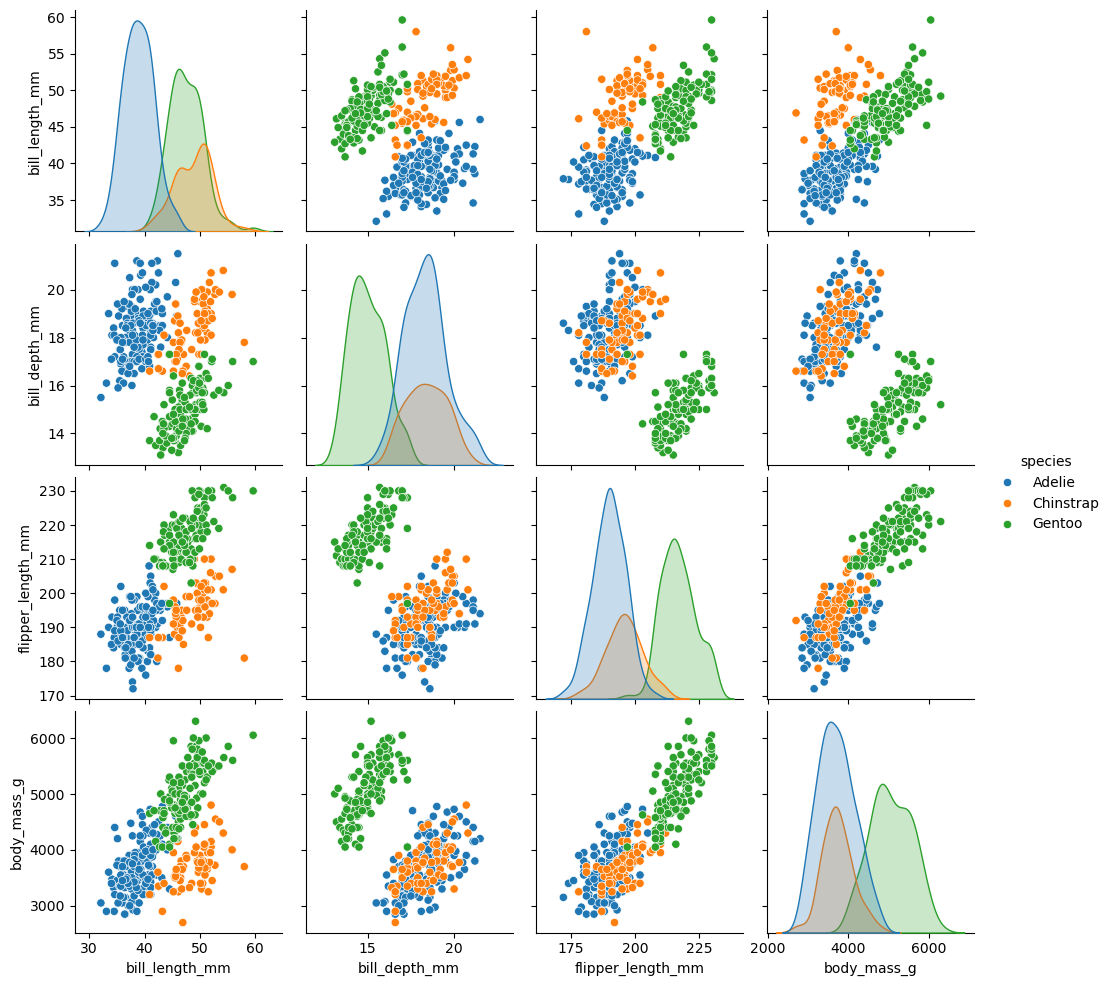

In [23]:
sns.pairplot(data=df_penguins, hue="species")
plt.show()

### 7. Module und Klassen zum Training und Bewertung eines ML-Modells auf Basis von RandomForestClassifier laden

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
# Nochmal kontrollieren: Alles "sauber"?
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.5,17.3,197.0,4050.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
# Kategorische Variablen (Features) des Datensatzes mit "one-hot-Codierung" umwandeln
penguins_encoded = pd.get_dummies(df_penguins, columns=["island", "sex"], dtype=int)
penguins_encoded

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,44.5,17.3,197.0,4050.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,44.5,17.3,197.0,4050.0,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,1,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [27]:
# Features und Target definieren
X = penguins_encoded.drop("species", axis=1)
y = penguins_encoded["species"]

In [28]:
# Datensatz in Trainings- und Testdatensätze aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Modelltraining und erste Bewertung der Trainingsdaten
mod = RandomForestClassifier(n_estimators=100, random_state=42)
mod.fit(X_train, y_train)
mod.score(X_train, y_train)

1.0

In [30]:
# Vorhersage und Auswertung
y_pred = mod.predict(X_test)
y_pred

array(['Chinstrap', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [31]:
# Die Qualität der Vorhersage ermitteln
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Zum Vergleich: ein neuronales Netz implementieren, trainieren und seine Vorhersagen auswerten

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
# Datensatz skalieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# -------------------- MLPClassifier --------------------
# Erstellen und Trainieren des MLPClassifier-Modells
# Hier verwenden wir eine einfache Architektur mit einer verborgenen Schicht
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Vorhersagen auf dem Testset
y_pred_mlp = mlp.predict(X_test_scaled)

# Bewertung der Genauigkeit
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Genauigkeit des MLPClassifier: {accuracy_mlp:.4f}")

Genauigkeit des MLPClassifier: 0.9710


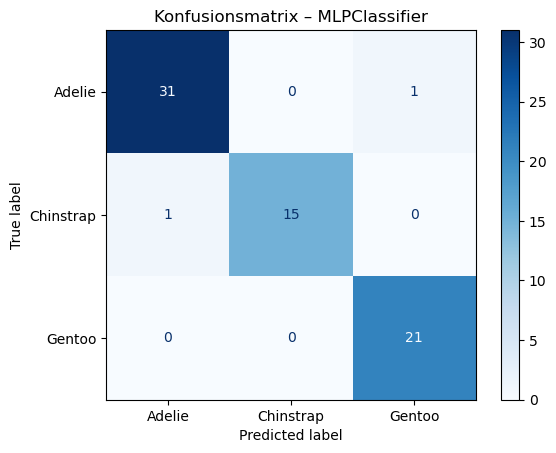

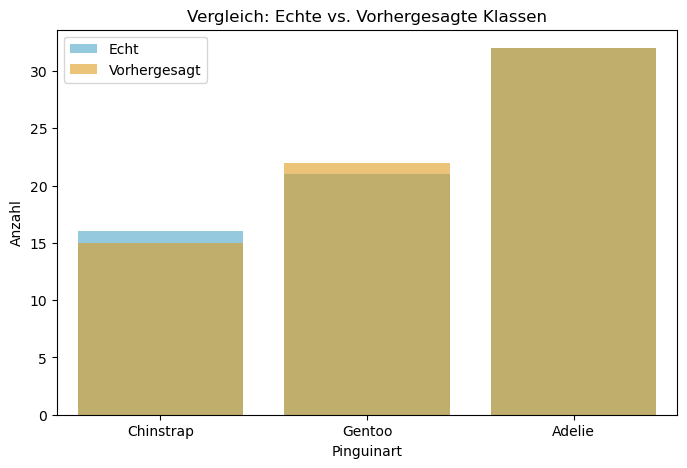

In [35]:
# -------------------- Auswertung der Vorhersagen --------------------

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test, y_pred_mlp)
labels = mlp.classes_  # Die Klassenlabels

# Konfusionsmatrix anzeigen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Konfusionsmatrix – MLPClassifier")
plt.grid(False)
plt.show()

# Balkendiagramm: Vergleich von echten und vorhergesagten Klassen
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, label="Echt", color="skyblue")
sns.countplot(x=y_pred_mlp, label="Vorhergesagt", color="orange", alpha=0.6)
plt.title("Vergleich: Echte vs. Vorhergesagte Klassen")
plt.xlabel("Pinguinart")
plt.ylabel("Anzahl")
plt.legend()
plt.show()


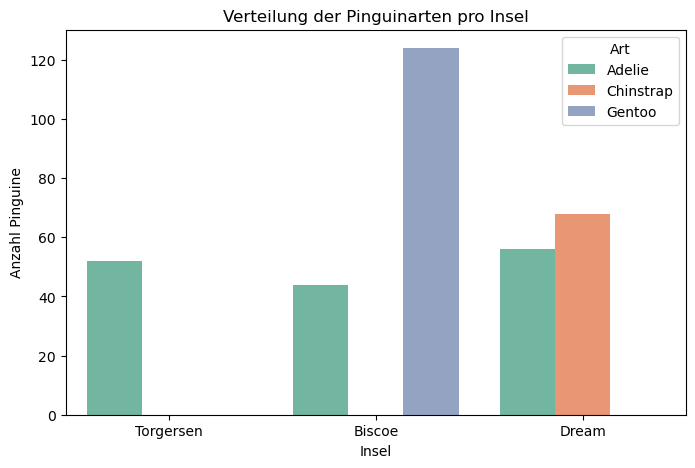

In [36]:
# -------------------- Bonus: Datensatz visuell erkunden --------------------

# 1. Verteilung nach Insel und Art
plt.figure(figsize=(8, 5))
sns.countplot(data=df_penguins, x="island", hue="species", palette="Set2")
plt.title("Verteilung der Pinguinarten pro Insel")
plt.xlabel("Insel")
plt.ylabel("Anzahl Pinguine")
plt.legend(title="Art")
plt.show()

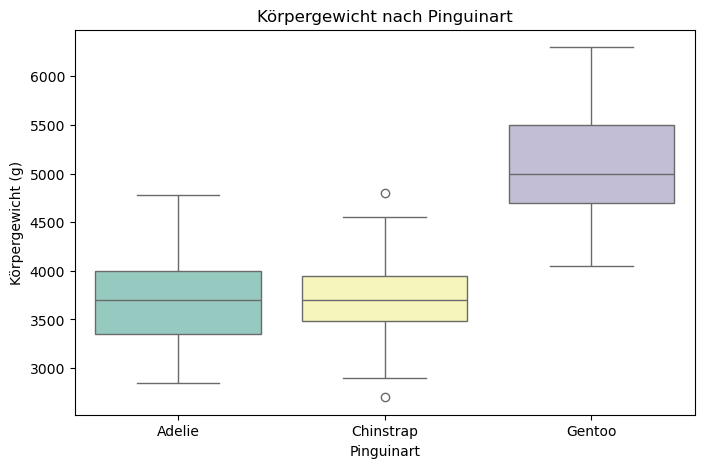

In [37]:
# 2. Körpergewicht nach Art
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_penguins, x="species", y="body_mass_g", palette="Set3")
plt.title("Körpergewicht nach Pinguinart")
plt.xlabel("Pinguinart")
plt.ylabel("Körpergewicht (g)")
plt.show()


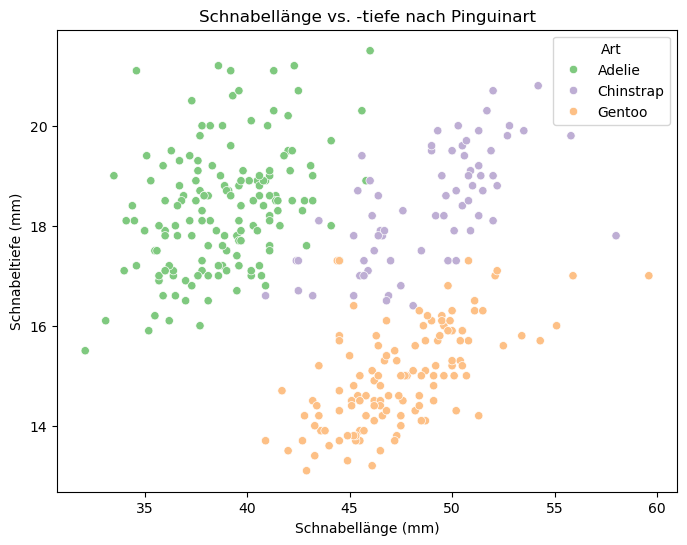

In [38]:
# 3. Schnabellänge vs. -tiefe nach Art
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", palette="Accent")
plt.title("Schnabellänge vs. -tiefe nach Pinguinart")
plt.xlabel("Schnabellänge (mm)")
plt.ylabel("Schnabeltiefe (mm)")
plt.legend(title="Art")
plt.show()

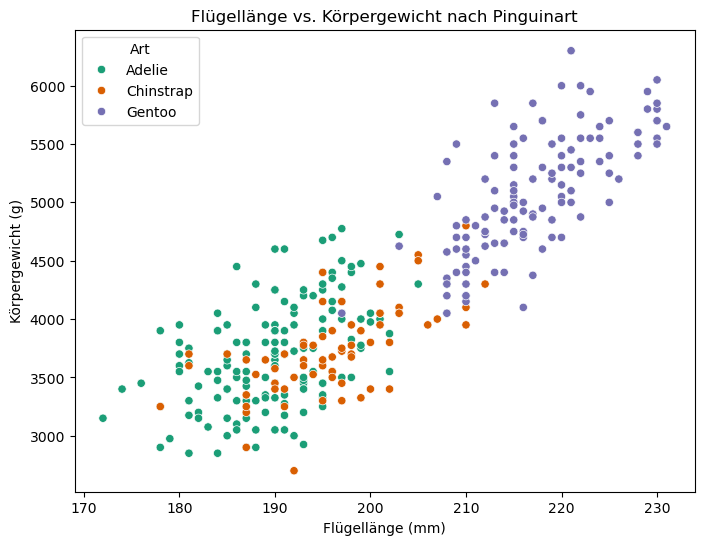

In [39]:
# 4. Flügellänge vs. Körpergewicht nach Art
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_penguins, x="flipper_length_mm", y="body_mass_g", hue="species", palette="Dark2")
plt.title("Flügellänge vs. Körpergewicht nach Pinguinart")
plt.xlabel("Flügellänge (mm)")
plt.ylabel("Körpergewicht (g)")
plt.legend(title="Art")
plt.show()